In [72]:
import pandas as pd

In [73]:
df = pd.read_csv("../data/Dataset-Cleaned.csv",dtype = {'id_str':object,'in_reply_to_user_id_str':object,'from_user_id_str':object,'in_reply_to_status_id_str':object})

In [74]:
num_tweets = len(df)
print(num_tweets)

77267


In [75]:
num_replies = len(df[df.in_reply_to_status_id_str.notnull()])
print("There are %d replies in the dataset." % num_replies)

There are 1185 replies in the dataset.


In [76]:
num_retweets = len(df[df.text.str.contains('RT @')])
print("There are %d retweets in the dataset." % num_retweets)

There are 60278 retweets in the dataset.


In [77]:
num_onlytweets = num_tweets - (num_replies + num_retweets)
print("There are %d tweets in the dataset that aren't replies or retweets"% num_onlytweets)

There are 15804 tweets in the dataset that aren't replies or retweets


In [78]:
num_users = len(df['from_user'].unique())
print("There are %d users in the dataset." % num_users)

There are 50195 users in the dataset.


In [79]:
avg_tweets = num_tweets / num_users
print("Each user posted an average of %f tweets" % avg_tweets)

Each user posted an average of 1.539337 tweets


In [80]:
avg_retweets = num_retweets / num_users
print("Each user retweeted an average of %f tweets" % avg_retweets)

Each user retweeted an average of 1.200877 tweets


In [81]:
avg_replies = num_replies / num_users
print("Each user replied to a tweet an average of %f times" % avg_replies)

Each user replied to a tweet an average of 0.023608 times


In [82]:
import matplotlib.pyplot as plt

In [83]:
labels = 'Retweets', 'Replies', 'Tweets'

In [84]:
sizes = [num_retweets, num_replies, num_onlytweets]

In [85]:
explode = (0,0,0)

In [86]:
fig1, ax1 = plt.subplots()

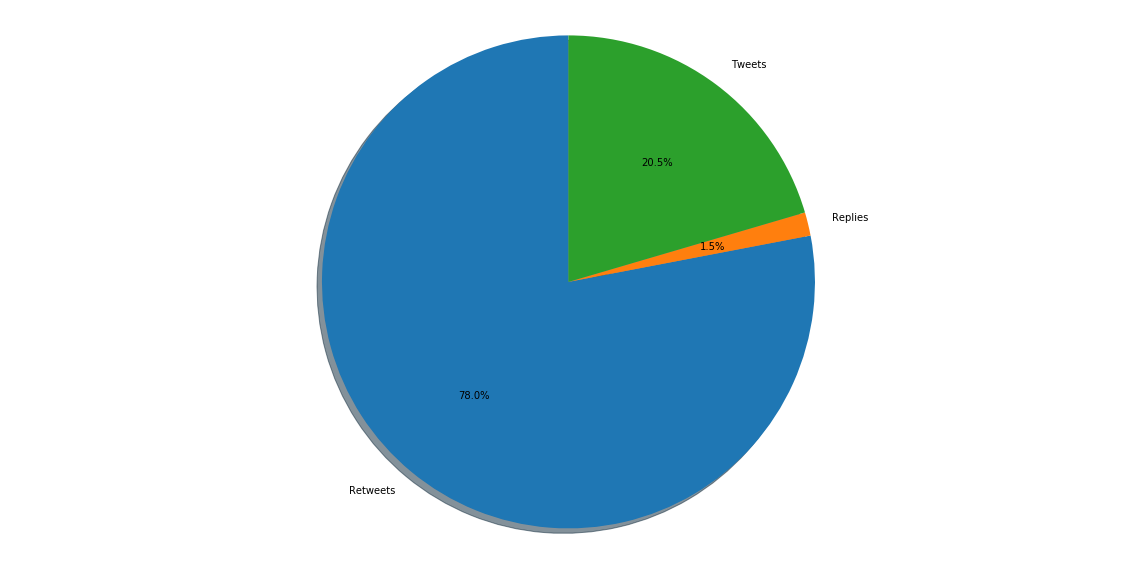

In [87]:
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [88]:
entities_list = df['entities_str']

In [89]:
entities_list

0        {"hashtags":[{"text":"GUERRIERO","indices":[44...
1        {"hashtags":[{"text":"CometLanding","indices":...
2        {"hashtags":[{"text":"CometLanding","indices":...
3        {"hashtags":[{"text":"cometlanding","indices":...
4        {"hashtags":[{"text":"CometLanding","indices":...
5        {"hashtags":[{"text":"CometLanding","indices":...
6        {"hashtags":[{"text":"CometLanding","indices":...
7        {"hashtags":[{"text":"CometLanding","indices":...
8        {"hashtags":[{"text":"CometLanding","indices":...
9        {"hashtags":[{"text":"CometLanding","indices":...
10       {"hashtags":[{"text":"CometLanding","indices":...
11       {"hashtags":[{"text":"CometLanding","indices":...
12       {"hashtags":[{"text":"CometLanding","indices":...
13       {"hashtags":[{"text":"cometlanding","indices":...
14       {"hashtags":[{"text":"SEP","indices":[30,34]},...
15       {"hashtags":[{"text":"cometlanding","indices":...
16       {"hashtags":[{"text":"probe","indices":[33,39].

In [90]:
import json

In [91]:
NewObject = json.loads(df.iloc[0].entities_str)

In [92]:
NewObject['hashtags']

[{'indices': [44, 54], 'text': 'GUERRIERO'},
 {'indices': [57, 69], 'text': 'portaaporta'},
 {'indices': [72, 85], 'text': 'CometLanding'},
 {'indices': [88, 100], 'text': 'TorSapienza'},
 {'indices': [103, 111], 'text': 'Rosetta'}]

In [ ]:
EntityArray = []
for x in range(0,len(df)):
    if isinstance(df.iloc[x].entities_str, str):
        EntityArray.append(json.loads(df.iloc[x].entities_str))

In [ ]:
EntityArray[0]['hashtags'][0]['text']

In [ ]:
HashTags = {}

In [ ]:
counter = 0
for i in range(0,len(EntityArray)):
    counter = counter +1
    for j in range(0,len(EntityArray[i]['hashtags'])):
        currentHashtag = str(EntityArray[i]['hashtags'][j]['text'])
        if currentHashtag in HashTags:
            HashTags[currentHashtag] = HashTags.get(currentHashtag) + 1
        else:
            HashTags[currentHashtag] = 1
counter

In [ ]:
HashTags

In [ ]:
tagList = sorted(HashTags.items(), key=lambda x:x[1])

In [ ]:
tagList[::-1]

In [ ]:
print("There are %d unique hashtags in the dataset." % len(tagList))

In [ ]:
Nov12Tweets = df['time']

In [ ]:
from datetime import datetime

In [ ]:
Nov12Tweets

In [ ]:
timeArray = []
for x in range(0,len(Nov12Tweets)):
    if isinstance(Nov12Tweets[x], str):
        timeArray.append(datetime.strptime(Nov12Tweets[x],'%d/%m/%Y %H:%M').replace(minute=0))

In [ ]:
timeArray

In [ ]:
from collections import Counter

In [ ]:
timeDictionary = Counter(timeArray)
timeDictionary

In [ ]:
dates = list(timeDictionary.keys())
count = list(timeDictionary.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'b^')
#plt.plot().scatter(dates,count, 'bo')
plt.show()

Following is a graph of the frequency of tweets across the first day.

In [ ]:
firstDayDict = {}
for x in timeDictionary:
    if x.month == 11 and x.day == 12:
        firstDayDict[x] = timeDictionary[x]
    else:
        break
firstDayDict

In [ ]:
dates = list(firstDayDict.keys())
count = list(firstDayDict.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'b-')
#plt.plot().scatter(dates,count, 'bo')
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(HashTags)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Extension: Analyse applications used to send tweets

In [ ]:
import re
appNames = []
source = df['source']
for s in source:
    if isinstance(s, str):
        appNames.append(re.sub("<[^<]+?>","",s).replace("/  +/g"," "))
appNames

In [ ]:
appcounter = Counter(appNames)

In [ ]:
appcounter